# Maestria Inteligencia Artificial
# Procesamiento del Lenguaje Natural
# *Profesor:* Jorge Andres Alvarado Valencia
# *Estudiante:* Jesús Ernesto Suárez Triana
## Tarea 1: Analisis exploratorio de texto de whatsapp

In [1]:
import os 
import re
import unicodedata

import pandas as pd 

# para tokenizar
import nltk
from nltk.corpus import stopwords


# para nube de palabras
import numpy, matplotlib
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy


print(os.getcwd())

/Users/habi/Documents/personal/nlp_course/tareas_talleres


In [2]:
def elimina_tildes(s):
    "Elimina tildes y espacio y deja todo formateado en guion bajo"
    s      = re.sub(r'[\W_]+', ' ', s).lower().strip(' ').strip()
    result = ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))
    return result


In [3]:
def open_file(path): 
    try:
        file = open(path)
        text_ = file.read()
        print('Texto cargado con exito')
        print(type(text_), len(text_))
        return text_
    except Exception as e: 
        print('Error en lectura de archivo')
        print(e)

In [4]:
text_ = open_file('tarea_1_whatsapp.txt')

Texto cargado con exito
<class 'str'> 63363


### Limpieza del texto

In [5]:
start_="learn more.\n"
init=text_.find(start_)
text_2=text_[init+len(start_):]
text_2[0:2000]

'17/12/2021, 21:46 - +57 322 3570601: Quién para una Pola\n17/12/2021, 21:46 - +57 322 3570601: Hay en Castilla\n17/12/2021, 22:34 - +57 322 3570601: Jajajak si ve , estos HP no son normales , sino es un lunes , martes miércoles no\n17/12/2021, 22:37 - +504 9508-4415: 😂\n18/12/2021, 00:38 - José Barboza: Que hacen?\n18/12/2021, 00:38 - José Barboza: Parcharon o no?\n18/12/2021, 00:40 - +57 322 3570601: Durmiendo\n18/12/2021, 00:40 - +57 322 3570601: Mk , hoy no es lunes ni martes\n18/12/2021, 00:41 - +57 322 3570601: Esta gente le gusta es arriesgar el trabajo , toman con adrenalina\n18/12/2021, 00:52 - +57 312 4369053: Ajjajaja\n18/12/2021, 00:52 - José Barboza: Q loks\n21/12/2021, 11:31 - +57 322 3570601: Hoy Pola ?\n21/12/2021, 13:02 - +57 319 2997716: <Media omitted>\n21/12/2021, 13:02 - +57 319 2997716: Meto\n21/12/2021, 13:06 - Santiago Murillo: <Media omitted>\n21/12/2021, 13:22 - Santiago Murillo: <Media omitted>\n21/12/2021, 13:22 - +57 319 2997716: <Media omitted>\n21/12/2021

### Get elements and data cleaning text

In [6]:
# GET ALL DATES
date_list = [ x.replace(' -', '').split(',')[0] for x in  re.findall('[ 0-9\/,:]+ -', text_2)]  
hour_list = [ x.replace(' -', '').split(',')[1].replace(' ','') for x in  re.findall('[ 0-9\/,:]+ -', text_2)]  
message_list = [elimina_tildes(x) for x in re.findall(r': (.*?)\n',text_2)]

In [7]:
text_message = ' '.join(message_list)

In [8]:
text_message = re.sub(r'ja|omitted|media|https|com|story+', '', text_message)

### Calculando estadísticas de hora de consulta de whatsapp por jornada

In [9]:
df = pd.DataFrame({'fecha' : date_list,
              'hora' : hour_list})

In [10]:
def cast_hour(x):
    x = df.hora[0]
    num = int(re.findall(r'(.*?):', x)[0])
    if (num >= 6) & (num <12):
        return 'mañana'
    elif (num >= 12) & (num <6):
        return 'tarde'
    elif (num >= 6) & (num <24):
        return 'noche'
    else:
        return 'madrugada'

In [11]:
df = df.assign(jornada = df.hora.apply(cast_hour))
df = df.assign(date_ = df.fecha.apply(lambda x: pd.to_datetime(x,  format='%d/%m/%Y')))

In [12]:
df2 = df.groupby(['date_', 'jornada']).agg(total_mensajes = ('hora', 'count')).reset_index()

In [13]:
df2.head()

,date_,jornada,total_mensajes
0,2021-12-17,noche,4
1,2021-12-18,noche,7
2,2021-12-21,noche,61
3,2021-12-22,noche,1
4,2021-12-24,noche,1


<AxesSubplot:title={'center':'total_mensajes'}, xlabel='jornada'>

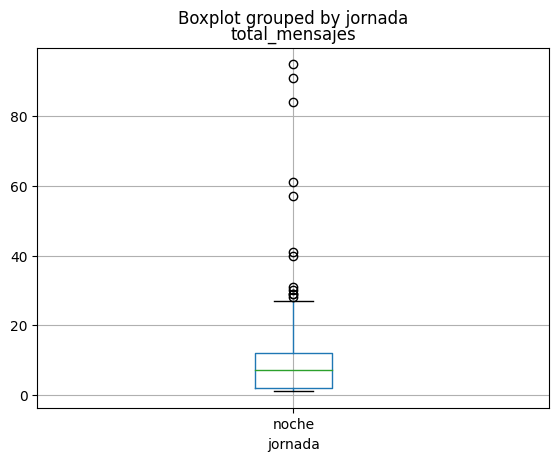

In [14]:
# gráficos
df2.boxplot(by='jornada', column = 'total_mensajes')

<AxesSubplot:xlabel='date_'>

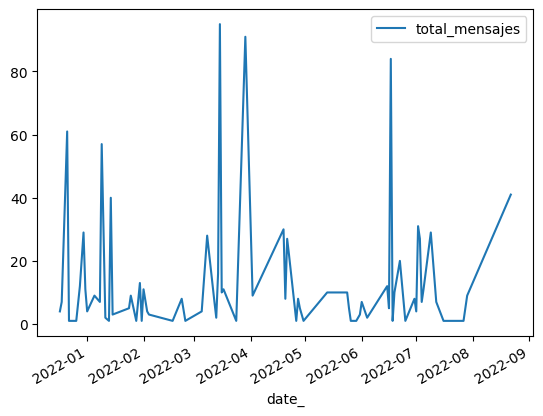

In [15]:
df2.plot(x='date_', y='total_mensajes')

### WordCloud de mensajes whatsapp

In [16]:
nltk.download("stopwords")
word_token_wh = nltk.tokenize.word_tokenize(text_message,language="spanish")
print(len(word_token_wh)," ",type(word_token_wh))

libro_wh = nltk.Text(word_token_wh)
libro_wh.count("amor")


3902   <class 'list'>


[nltk_data] Downloading package stopwords to /Users/habi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


5

#### Calculo de diversidad léxica

In [17]:
diversidad_lexica=len(set(libro_wh))/len(libro_wh)
print(diversidad_lexica)

0.32188621219887237


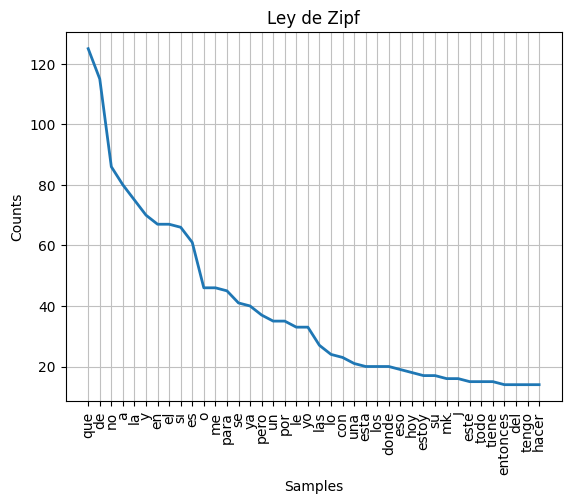

<AxesSubplot:title={'center':'Ley de Zipf'}, xlabel='Samples', ylabel='Counts'>

In [18]:
freq_dist = nltk.FreqDist(libro_wh)
freq_dist.plot(40,cumulative=False, title= 'Ley de Zipf')

#### word cloud sin procesos

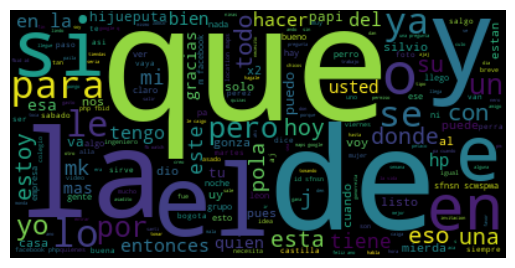

None

In [19]:
# nube con stopword
nubea=WordCloud()
nubea.generate(text_message)
plt.figure()
plt.imshow(nubea, interpolation="bilinear")
plt.axis("off")
figura=plt.show()
display(figura)

#### Word cloud sin Stopwords

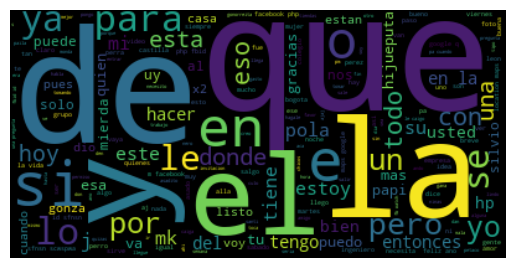

None

In [20]:
#nube sin stopwords
nubeb=WordCloud()
nubeb.generate(text_message)
plt.figure()
plt.imshow(nubeb, interpolation="bilinear")
plt.axis("off")
figura2=plt.show()
display(figura2)

#### Word Cloud con modelo space

In [21]:
spacy.cli.download("es")
nlp=spacy.load("es_core_news_sm")
doc1=nlp(text_message)


⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package name 'es_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 21.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [22]:
morfo=[]
for x in range(1,len(doc1)):
    morfo.append([doc1[x].text, doc1[x].lemma_,doc1[x].is_stop, doc1[x].is_punct, doc1[x].is_alpha])
#morfo[100:120]

palabras=pd.DataFrame(morfo)
palabras.columns = ['palabra', 'lemma', 'is_stop', 'is_punctuation', 'is_numeric']
palabras.head(5)



,palabra,lemma,is_stop,is_punctuation,is_numeric
0,para,para,True,False,True
1,una,uno,True,False,True
2,pola,pola,False,False,True
3,hay,haber,True,False,True
4,en,en,True,False,True


In [23]:
#quitar stopwords
palabras=palabras[palabras.is_stop==False]
#quitar puntuacion
palabras=palabras[palabras.is_punctuation==False]
##quitar números
palabras=palabras[palabras.is_numeric==True]
print(palabras.shape)
palabras.head(20)

(1644, 5)


,palabra,lemma,is_stop,is_punctuation,is_numeric
2,pola,pola,False,False,True
5,castilla,castilla,False,False,True
6,k,k,False,False,True
8,ve,ver,False,False,True
10,hp,hp,False,False,True
13,normales,normal,False,False,True
17,lunes,lunes,False,False,True
18,martes,martes,False,False,True
19,miercoles,miercol,False,False,True
24,parcharon,parchar,False,False,True


In [24]:
# calculo de tokens por palabra
contapal=pd.value_counts(palabras.palabra)
contapal2=contapal.to_frame()
contapal2.columns=["conteo"]
contapal2.index.name="entidad"
contapal2["palabra"]=contapal2.index
contapal2.head(20)


,conteo,palabra
entidad,,
j,16,j
mk,16,mk
pa,13,pa
hp,12,hp
gracias,12,gracias
papi,11,papi
uy,10,uy
mierda,10,mierda
facebook,10,facebook


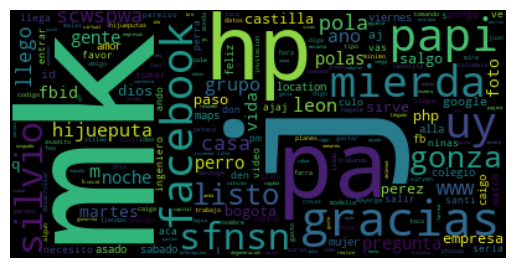

None

In [25]:
diccio={}
for freq,name in contapal2.values:
    diccio[name]=freq

nube = WordCloud()
nube.generate_from_frequencies(frequencies=diccio)
plt.figure()
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")

figura3=plt.show()
display(figura3)